<a href="https://colab.research.google.com/github/carlsec/machine_learning/blob/master/intel_dataset_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import zipfile
path = '/content/drive/My Drive/images_intel.zip'
zip_object = zipfile.ZipFile(file = path, mode = 'r')
zip_object.extractall('./')
zip_object.close()

In [ ]:
PATH_train = 'seg_train'
PATH_test = 'seg_test'

In [ ]:
train_dir = os.path.join(PATH_train, 'seg_train')
validation_dir = os.path.join(PATH_test, 'seg_test')

In [ ]:
input_shape = (299, 299, 3)

In [ ]:
base_model = tf.keras.applications.Xception(
    input_shape=input_shape,
    include_top=False,
    weights="imagenet",
)

83689472/83683744 [==============================] - 1s 0us/step


In [ ]:
base_model.summary()

Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 149, 149, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 149, 149, 32) 0           block1_conv1_bn[0][0]            
___________________________________________________________________________________________

In [ ]:
base_model.trainable = False

In [ ]:
base_model.output

<tf.Tensor 'block14_sepconv2_act/Relu:0' shape=(None, 10, 10, 2048) dtype=float32>

In [ ]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)

In [ ]:
prediction_layer = tf.keras.layers.Dense(units = 6, activation = "softmax")(global_average_layer)

In [ ]:
model = tf.keras.models.Model(inputs = base_model.input, outputs = prediction_layer)

In [ ]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 149, 149, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 149, 149, 32) 0           block1_conv1_bn[0][0]            
_______________________________________________________________________________________

In [ ]:
train_image_generator = ImageDataGenerator(rotation_range=0.5, width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.4,rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)

In [ ]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=128,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(299, 299),
                                                           class_mode='categorical')

Found 14034 images belonging to 6 classes.


In [ ]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=128,
                                                              directory=validation_dir,
                                                              target_size=(299, 299),
                                                              class_mode='categorical')

Found 3000 images belonging to 6 classes.


In [ ]:
sample_training_images, _ = next(train_data_gen)

In [ ]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 6, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

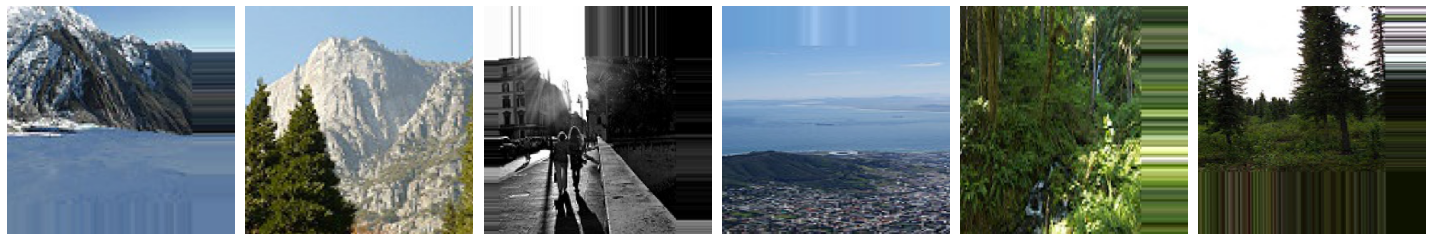

In [ ]:
plotImages(sample_training_images[:6])

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr = 0.0001), loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
history = model.fit(train_data_gen, epochs=5, validation_data=val_data_gen)

Epoch 1/5
110/110 [==============================] - 325s 3s/step - loss: 1.5128 - accuracy: 0.5196 - val_loss: 1.1724 - val_accuracy: 0.7740
Epoch 2/5
110/110 [==============================] - 310s 3s/step - loss: 1.0408 - accuracy: 0.8083 - val_loss: 0.8398 - val_accuracy: 0.8097
Epoch 3/5
110/110 [==============================] - 303s 3s/step - loss: 0.7847 - accuracy: 0.8393 - val_loss: 0.6636 - val_accuracy: 0.8287
Epoch 4/5
110/110 [==============================] - 300s 3s/step - loss: 0.6498 - accuracy: 0.8499 - val_loss: 0.5636 - val_accuracy: 0.8417
Epoch 5/5
110/110 [==============================] - 305s 3s/step - loss: 0.5641 - accuracy: 0.8573 - val_loss: 0.5006 - val_accuracy: 0.8500


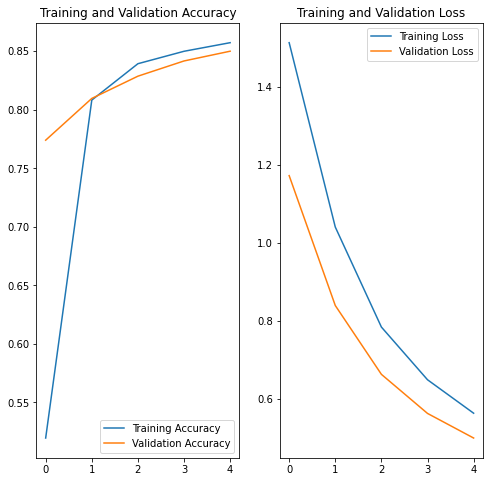

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(5)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
base_model.trainable = True
len(base_model.layers)

132

In [ ]:
fine_tuning = 95

for layer in base_model.layers[:fine_tuning]:
  layer.trainable = False

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr = 0.0001), loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
history_tunning = model.fit(train_data_gen, epochs=12, validation_data=val_data_gen)

Epoch 1/12
110/110 [==============================] - 330s 3s/step - loss: 0.2898 - accuracy: 0.9001 - val_loss: 0.2261 - val_accuracy: 0.9193
Epoch 2/12
110/110 [==============================] - 320s 3s/step - loss: 0.2019 - accuracy: 0.9268 - val_loss: 0.1877 - val_accuracy: 0.9287
Epoch 3/12
110/110 [==============================] - 319s 3s/step - loss: 0.1681 - accuracy: 0.9379 - val_loss: 0.1738 - val_accuracy: 0.9357
Epoch 4/12
110/110 [==============================] - 317s 3s/step - loss: 0.1494 - accuracy: 0.9461 - val_loss: 0.1925 - val_accuracy: 0.9270
Epoch 5/12
110/110 [==============================] - 328s 3s/step - loss: 0.1287 - accuracy: 0.9540 - val_loss: 0.1766 - val_accuracy: 0.9350
Epoch 6/12
110/110 [==============================] - 329s 3s/step - loss: 0.1076 - accuracy: 0.9606 - val_loss: 0.1874 - val_accuracy: 0.9330
Epoch 7/12
110/110 [==============================] - 334s 3s/step - loss: 0.0974 - accuracy: 0.9649 - val_loss: 0.2103 - val_accuracy: 0.9323